In [266]:
from F_Slices_Functions import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io

# 2019_02_04-M08-32
# 2019_02_04-M09-50
# 2019_02_04-M10-25
# 2019_03_13-M01-21
# 2019_04_05-M01-48
# 2019_04_05-M02-27
# 2019_04_05-M03-19
# 2019_04_05-M04-16
# 2019_04_05-M05-16
# 2019_04_10-M01-22

# 2019_04_10-M02-14

# 2019_06_25-M01-20
# 2019_06_25-M02-12
# 2019_06_25-M05-21
# 2019_07_24-M01-20
# 2019_07_24-M03-14
# 2019_07_31-M01-17
# 2019_07_31-M04-12
# 2019_07_31-M05-12
# 2019_08_07-M01-17
# 2019_08_07-M03-24
# 2019_09_11-M02-35
# 2019_10_17-M02-6
# 2019_10_17-M03-24

img_dir = "2019_10_17-M02"

Original Image Shape: (3624, 2343, 4)
Gray Original Image Shape: (3624, 2343)
Gray Image Resized Shape:  (362, 234)
Gray Image Resized Flattend Shape:  (84708,)
95th percentile of arr :  15.0
Max value: 1.0   with Max index: 5
Distribution list Shape from Max value and after: (90,)
Best Correlation: 0.9741239538455089  with (a,b): 1.4100000000000001 23.0
Mean, Variance, Skew, Kurtosis: 0.057763211798443265 0.0021419371570708954 1.4472484562294752 2.808271814889873
SAVED Signal----------------------------------------


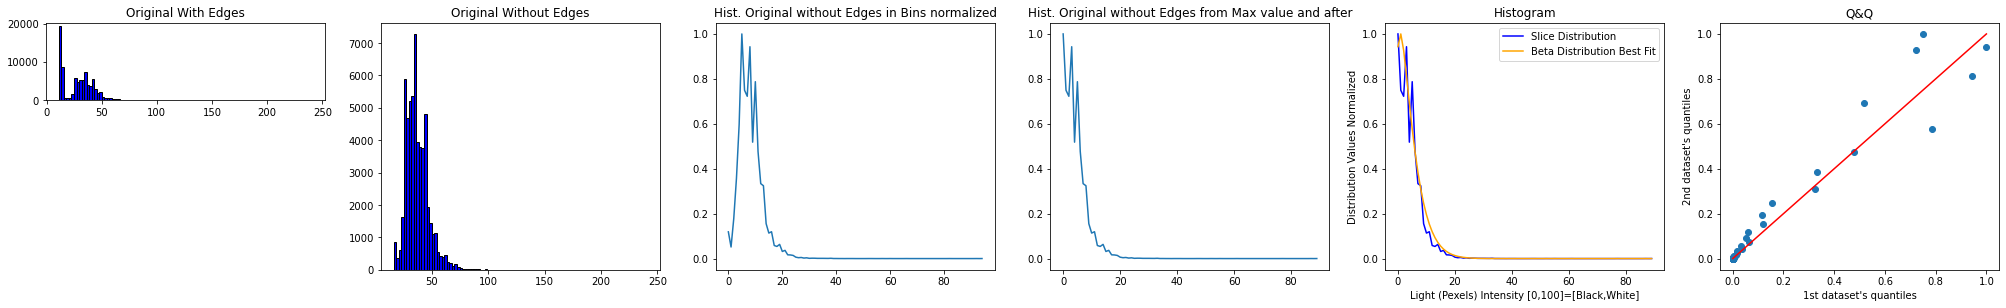

In [263]:
img_step = 24
img_path = "D:/Ultrasound/Slices-Images/"+img_dir+"-"+str(img_step)+".png"
distribution_saved_path = "D:/Ultrasound/Slices-Distributions/"+img_dir+"-"+str(img_step)+".mat"
img, img_flattened = Read_Image_Gray_Down_Scale(img_path, 10)
img_flattened_without_edges = Remove_From_Image_Edges_Background(img,img_flattened,2,95)
#----------------------------------------------------------------------------------------------------------------------------------------- Add Black & White
#img_flattened = Add_Black_White_Limits(img_flattened)
#img_flattened_without_edges = Add_Black_White_Limits(img_flattened_without_edges)
#----------------------------------------------------------------------------------------------------------------------------------------- Histograms & Normalization
img_flattened_without_edges_hist, _ = np.histogram(img_flattened_without_edges, bins=95)
img_flattened_without_edges_hist_normalized = Normalization_of_List(img_flattened_without_edges_hist)
img_flattened_without_edges_hist_normalized = img_flattened_without_edges_hist_normalized.reshape(-1)
#----------------------------------------------------------------------------------------------------------------------------------------- Selection of Upper part
img_flattened_without_edges_hist_normalized_short = Array_1d_From_Pick_And_After(img_flattened_without_edges_hist_normalized)
#----------------------------------------------------------------------------------------------------------------------------------------- Beta Distribution
a, b, mean, var, skew, kurt, x_beta, y_beta = Beta_Distribution_Best_Fit(img_flattened_without_edges_hist_normalized_short)
#----------------------------------------------------------------------------------------------------------------------------------------- Plots
plt.figure(1, figsize=(35,10))
plt.clf()
plt.subplot(661) #---------------------------------- 
plt.hist(img_flattened,color = 'blue', edgecolor = 'black', bins=100)
plt.title("Original With Edges")
plt.show
plt.subplot(262) #---------------------------------- 
plt.hist(img_flattened_without_edges,color = 'blue', edgecolor = 'black', bins=100)
plt.title("Original Without Edges")
plt.show
plt.subplot(263) #---------------------------------- 
plt.plot(img_flattened_without_edges_hist_normalized)
plt.title("Hist. Original without Edges in Bins normalized")
plt.show
plt.subplot(264) #---------------------------------- 
plt.plot(img_flattened_without_edges_hist_normalized_short)
plt.title("Hist. Original without Edges from Max value and after")
plt.show
plt.subplot(265) #---------------------------------- 
plt.plot(img_flattened_without_edges_hist_normalized_short,'blue',label='Slice Distribution')
plt.plot(y_beta,'orange',label='Beta Distribution Best Fit')
plt.title("Histogram")
plt.xlabel("Light (Pexels) Intensity [0,100]=[Black,White]")
plt.ylabel("Distribution Values Normalized")
plt.legend()
plt.show
plt.subplot(266) #---------------------------------- 
x1 = img_flattened_without_edges_hist_normalized_short
x2 = y_beta
plt.scatter(x1,x2)
plt.plot([min(x1),max(x1)],[min(x1),max(x1)],color="red")
plt.xlabel("1st dataset's quantiles")
plt.ylabel("2nd dataset's quantiles")
plt.title("Q&Q")
plt.show
#----------------------------------------------------------------------------------------------------------------------------------------- Save Denoised Normalized Signal
io.savemat(distribution_saved_path, mdict={'saved_data': y_beta})
print("SAVED Signal----------------------------------------")

--------------- 1
Original Image Shape: (3525, 2409, 4)
Gray Original Image Shape: (3525, 2409)
Gray Image Resized Shape:  (352, 240)
Gray Image Resized Flattend Shape:  (84480,)
85th percentile of arr :  13.0
Max value: 1.0   with Max index: 9
Distribution list Shape from Max value and after: (91,)
Best Correlation: 0.9831938249448252  with (a,b): 1.61 43.0
Mean, Variance, Skew, Kurtosis: 0.03609056265411343 0.0007627282162118602 1.4415482706702671 2.9255968062729147


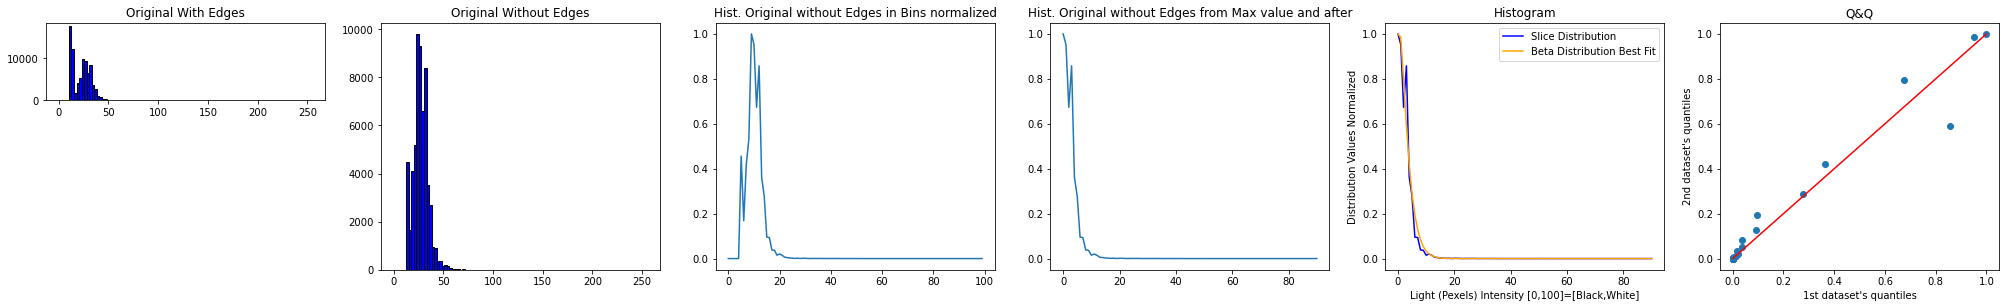

SAVED Signal----------------------------------------
--------------- 2
Original Image Shape: (3753, 2573, 4)
Gray Original Image Shape: (3753, 2573)
Gray Image Resized Shape:  (375, 257)
Gray Image Resized Flattend Shape:  (96375,)
85th percentile of arr :  13.0
Max value: 1.0   with Max index: 10
Distribution list Shape from Max value and after: (90,)
Best Correlation: 0.9903724870109224  with (a,b): 1.61 61.0
Mean, Variance, Skew, Kurtosis: 0.02571474205398499 0.0003938609353102029 1.479545829583484 3.142087316720289


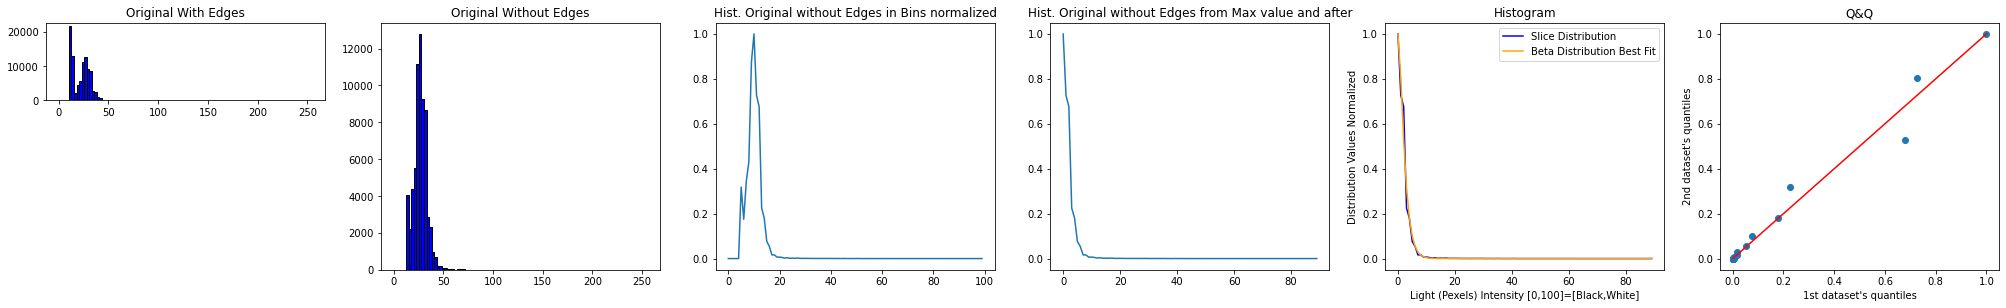

SAVED Signal----------------------------------------
--------------- 3
Original Image Shape: (3870, 2558, 4)
Gray Original Image Shape: (3870, 2558)
Gray Image Resized Shape:  (387, 255)
Gray Image Resized Flattend Shape:  (98685,)
85th percentile of arr :  13.0
Max value: 1.0   with Max index: 10
Distribution list Shape from Max value and after: (90,)
Best Correlation: 0.99033478852231  with (a,b): 0.6100000000000001 33.0
Mean, Variance, Skew, Kurtosis: 0.01814936030943172 0.0005148789664776118 2.385326770033078 8.137661886595554


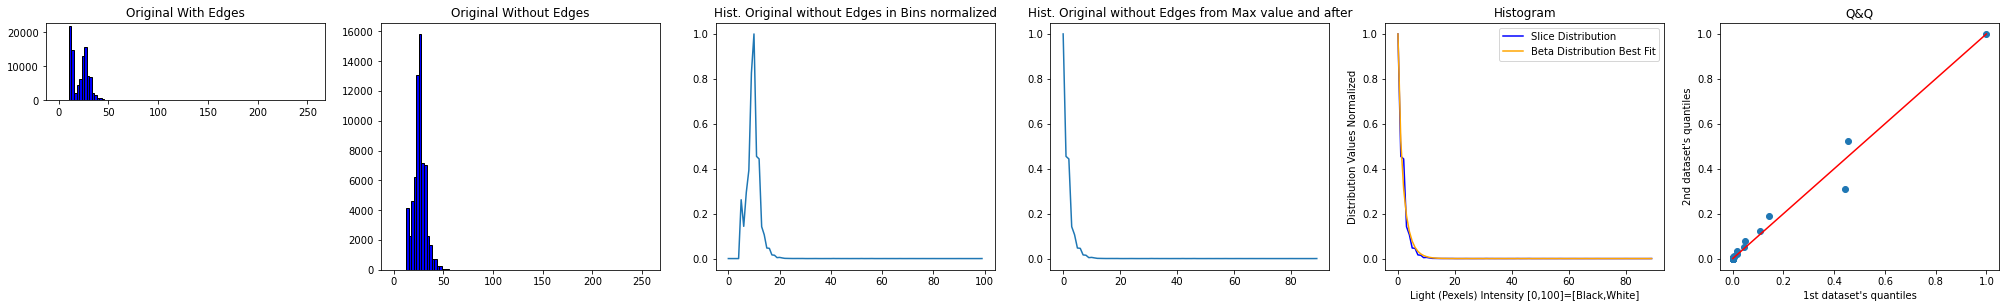

SAVED Signal----------------------------------------
--------------- 4
Original Image Shape: (3940, 2865, 4)
Gray Original Image Shape: (3940, 2865)
Gray Image Resized Shape:  (394, 286)
Gray Image Resized Flattend Shape:  (112684,)
85th percentile of arr :  12.0
Max value: 1.0   with Max index: 5
Distribution list Shape from Max value and after: (95,)
Best Correlation: 0.8700820845749302  with (a,b): 0.6100000000000001 7.0
Mean, Variance, Skew, Kurtosis: 0.08015768725361368 0.00856358100206336 1.8884048378542442 4.2794476784133275


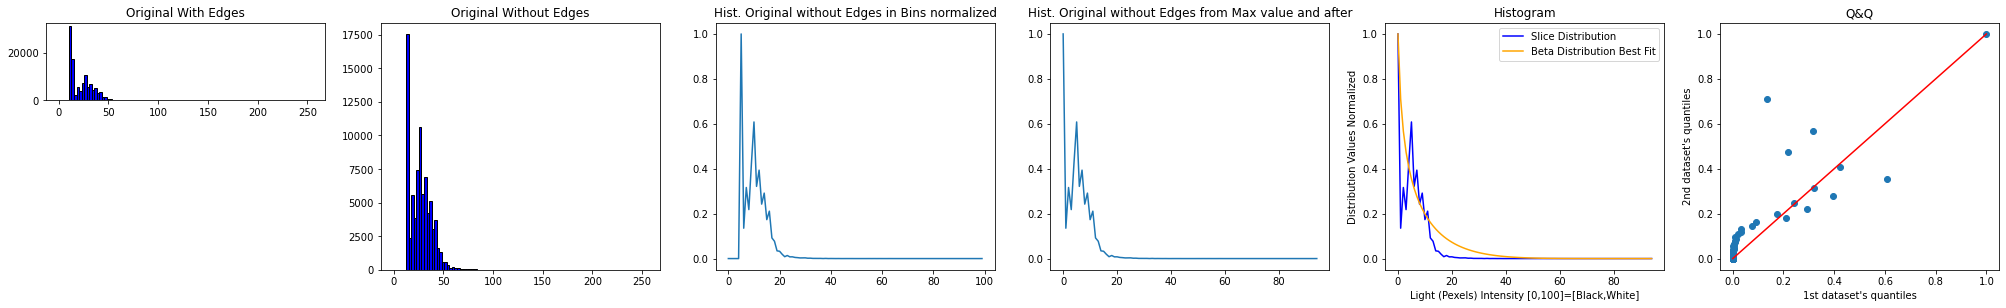

SAVED Signal----------------------------------------
--------------- 5
Original Image Shape: (3973, 2358, 4)
Gray Original Image Shape: (3973, 2358)
Gray Image Resized Shape:  (397, 235)
Gray Image Resized Flattend Shape:  (93295,)
85th percentile of arr :  13.0
Max value: 1.0   with Max index: 12
Distribution list Shape from Max value and after: (88,)
Best Correlation: 0.9875127718588509  with (a,b): 1.01 41.0
Mean, Variance, Skew, Kurtosis: 0.024041894786955488 0.0005455448054407918 1.8520902149521168 4.897737667577776


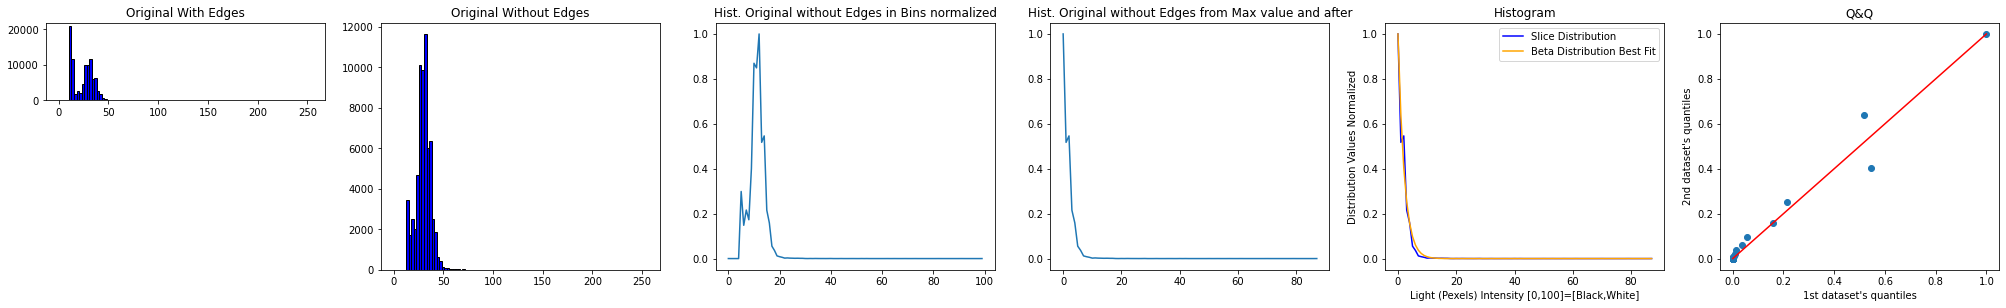

SAVED Signal----------------------------------------
--------------- 6
Original Image Shape: (3960, 2911, 4)
Gray Original Image Shape: (3960, 2911)
Gray Image Resized Shape:  (396, 291)
Gray Image Resized Flattend Shape:  (115236,)
85th percentile of arr :  13.0
Max value: 1.0   with Max index: 10
Distribution list Shape from Max value and after: (90,)
Best Correlation: 0.9922710739216175  with (a,b): 1.2100000000000002 45.5
Mean, Variance, Skew, Kurtosis: 0.025904517233997008 0.0005288927524810429 1.692871022873224 4.091542460382729


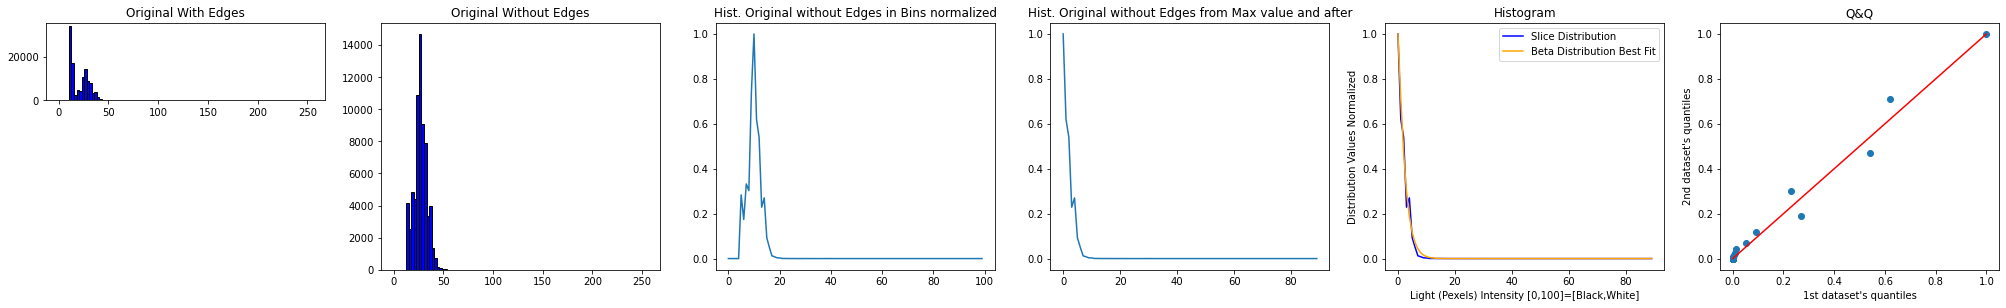

SAVED Signal----------------------------------------
--------------- 7


FileNotFoundError: [Errno 2] No such file or directory: 'D:/Ultrasound/Slices-Images/2019_10_17-M02-7.png'

In [267]:
for img_step in range(1,40):  
    print("---------------",img_step)
    img_path = "D:/Ultrasound/Slices-Images/"+img_dir+"-"+str(img_step)+".png"
    distribution_saved_path = "D:/Ultrasound/Slices-Distributions/"+img_dir+"-"+str(img_step)+".mat"
    img, img_flattened = Read_Image_Gray_Down_Scale(img_path, 10)
    img_flattened_without_edges = Remove_From_Image_Edges_Background(img,img_flattened,2,85)
    #----------------------------------------------------------------------------------------------------------------------------------------- Add Black & White
    img_flattened = Add_Black_White_Limits(img_flattened)
    img_flattened_without_edges = Add_Black_White_Limits(img_flattened_without_edges)
    #----------------------------------------------------------------------------------------------------------------------------------------- Histograms & Normalization
    img_flattened_without_edges_hist, _ = np.histogram(img_flattened_without_edges, bins=100)
    img_flattened_without_edges_hist_normalized = Normalization_of_List(img_flattened_without_edges_hist)
    img_flattened_without_edges_hist_normalized = img_flattened_without_edges_hist_normalized.reshape(-1)
    #----------------------------------------------------------------------------------------------------------------------------------------- Selection of Upper part
    img_flattened_without_edges_hist_normalized_short = Array_1d_From_Pick_And_After(img_flattened_without_edges_hist_normalized)
    #----------------------------------------------------------------------------------------------------------------------------------------- Beta Distribution
    a, b, mean, var, skew, kurt, x_beta, y_beta = Beta_Distribution_Best_Fit(img_flattened_without_edges_hist_normalized_short)
    #----------------------------------------------------------------------------------------------------------------------------------------- Plots
    plt.figure(1, figsize=(35,10))
    plt.clf()
    plt.subplot(661) #---------------------------------- 
    plt.hist(img_flattened,color = 'blue', edgecolor = 'black', bins=100)
    plt.title("Original With Edges")
    plt.show
    plt.subplot(262) #---------------------------------- 
    plt.hist(img_flattened_without_edges,color = 'blue', edgecolor = 'black', bins=100)
    plt.title("Original Without Edges")
    plt.show
    plt.subplot(263) #---------------------------------- 
    plt.plot(img_flattened_without_edges_hist_normalized)
    plt.title("Hist. Original without Edges in Bins normalized")
    plt.show
    plt.subplot(264) #---------------------------------- 
    plt.plot(img_flattened_without_edges_hist_normalized_short)
    plt.title("Hist. Original without Edges from Max value and after")
    plt.show
    plt.subplot(265) #---------------------------------- 
    plt.plot(img_flattened_without_edges_hist_normalized_short,'blue',label='Slice Distribution')
    plt.plot(y_beta,'orange',label='Beta Distribution Best Fit')
    plt.title("Histogram")
    plt.xlabel("Light (Pexels) Intensity [0,100]=[Black,White]")
    plt.ylabel("Distribution Values Normalized")
    plt.legend()
    plt.show
    plt.subplot(266) #---------------------------------- 
    x1 = img_flattened_without_edges_hist_normalized_short
    x2 = y_beta
    plt.scatter(x1,x2)
    plt.plot([min(x1),max(x1)],[min(x1),max(x1)],color="red")
    plt.xlabel("1st dataset's quantiles")
    plt.ylabel("2nd dataset's quantiles")
    plt.title("Q&Q")
    plt.show()
    #----------------------------------------------------------------------------------------------------------------------------------------- Save Denoised Normalized Signal
    io.savemat(distribution_saved_path, mdict={'saved_data': y_beta})
    print("SAVED Signal----------------------------------------")

Original Image Shape: (3533, 18275, 4)
Gray Original Image Shape: (3533, 18275)
Gray Image Resized Shape:  (353, 1827)
Gray Image Resized Flattend Shape:  (644931,)
98th percentile of arr :  23.0
Mean Original: 19.43703124830408
SD Original: 8.064120806912792
Mean Original without Edges: 29.376713486217557
SD Original without Edges: 6.827221053672354


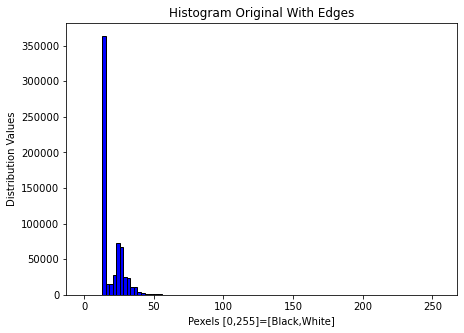

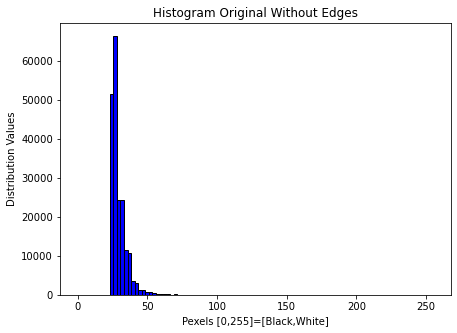

Histogram Shape Original Image without Edges with 100 Bins: (100,)


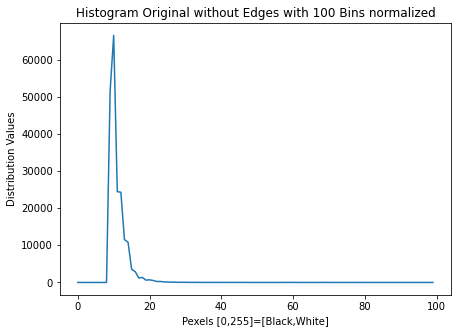

Histogram Original without Edges with 100 Bins normalized (100,)


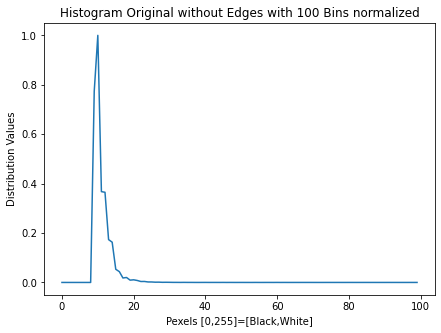

Max value: 1.0   with Max index: 10
Distribution list Shape from Max value and after: (90,)


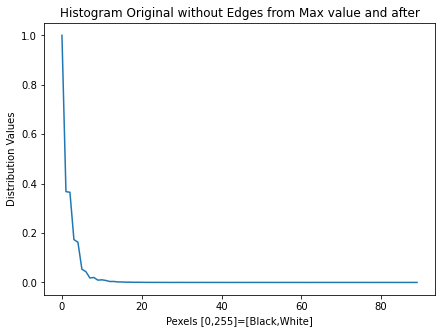

Best Correlation: 0.9915822597033075  with (a,b): 0.21000000000000002 18.5
Mean, Variance, Skew, Kurtosis: 0.01122394441475147 0.0005630627847045173 3.978427084280887 22.37186348905354


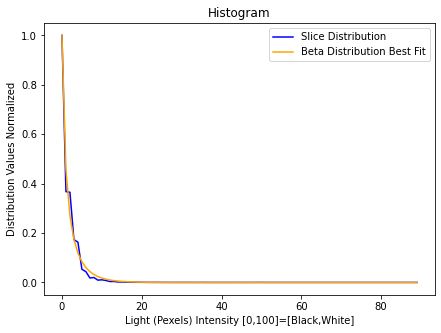

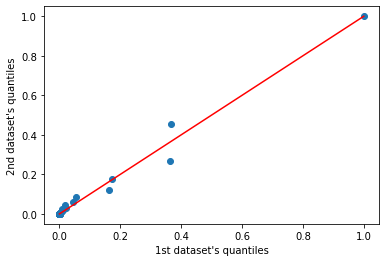

In [5]:
img_path = "D:/Ultrasound/Slices-Images/2019_03_13-M01-1.png"
distribution_saved_path = "D:/Ultrasound/Slices-Images/2019_03_13-M01-1.mat"
img, img_flattened = Read_Image_Gray_Down_Scale(img_path, 10)
img_flattened_without_edges = Remove_From_Image_Edges_Background(img,img_flattened,2,98)

img_mean, img_std = Calculate_Mean_SD(img_flattened,"Original")
img_without_edges_mean, img_without_edges_std = Calculate_Mean_SD(img_flattened_without_edges,"Original without Edges")

img_flattened = Add_Black_White_Limits(img_flattened)
img_flattened_without_edges = Add_Black_White_Limits(img_flattened_without_edges)

Plot_Basic_Histogram(img_flattened,"Original With Edges","Distribution Values","Pexels [0,255]=[Black,White]")
Plot_Basic_Histogram(img_flattened_without_edges,"Original Without Edges","Distribution Values","Pexels [0,255]=[Black,White]")

#------------------------------------------------------------------- Histograms & Normalization
img_flattened_without_edges_hist, _ = np.histogram(img_flattened_without_edges, bins=100)
print("Histogram Shape Original Image without Edges with 100 Bins:",img_flattened_without_edges_hist.shape)
Plot_Basic(img_flattened_without_edges_hist,"Histogram Original without Edges with 100 Bins normalized","Distribution Values","Pexels [0,255]=[Black,White]")
img_flattened_without_edges_hist_normalized = Normalization_of_List(img_flattened_without_edges_hist)
img_flattened_without_edges_hist_normalized = img_flattened_without_edges_hist_normalized.reshape(-1)
print("Histogram Original without Edges with 100 Bins normalized",img_flattened_without_edges_hist_normalized.shape)
Plot_Basic(img_flattened_without_edges_hist_normalized,"Histogram Original without Edges with 100 Bins normalized","Distribution Values","Pexels [0,255]=[Black,White]")

#------------------------------------------------------------------- Selection of Upper part
img_flattened_without_edges_hist_normalized_short = Array_1d_From_Pick_And_After(img_flattened_without_edges_hist_normalized)
Plot_Basic(img_flattened_without_edges_hist_normalized_short,"Histogram Original without Edges from Max value and after","Distribution Values","Pexels [0,255]=[Black,White]")

#------------------------------------------------------------------- Beta Distribution
a, b, mean, var, skew, kurt, x_beta, y_beta = Beta_Distribution_Best_Fit(img_flattened_without_edges_hist_normalized_short)

# matplotlib histogram
plt.figure(1, figsize=(7,5))
plt.plot(img_flattened_without_edges_hist_normalized_short,'blue',label='Slice Distribution')
plt.plot(y_beta,'orange',label='Beta Distribution Best Fit')
plt.title("Histogram")
plt.legend()
plt.xlabel("Light (Pexels) Intensity [0,100]=[Black,White]")
plt.ylabel("Distribution Values Normalized")
plt.show()

x1 = img_flattened_without_edges_hist_normalized_short
x2 = y_beta
plt.scatter(x1,x2)
plt.plot([min(x1),max(x1)],[min(x1),max(x1)],color="red")
plt.xlabel("1st dataset's quantiles")
plt.ylabel("2nd dataset's quantiles")
plt.show()

#--------------------------------------------------- Save Denoised Normalized Signal
#io.savemat(distribution_saved_path, mdict={'saved_data': img_flattened_without_edges_hist_normalized_short})
#print("SAVED Signal----------------------------------------")

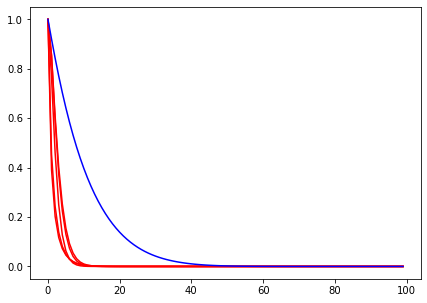

In [141]:
y_best_1_normalized = Normalization_of_List(beta.pdf(np.linspace(0.01,0.99, 100), 0.01, 26.6))
y_best_2_normalized = Normalization_of_List(beta.pdf(np.linspace(0.01,0.99, 100), 1.71, 65.4))
y_best_3_normalized = Normalization_of_List(beta.pdf(np.linspace(0.01,0.99, 100), 1.61, 58.59))
y_best_4_normalized = Normalization_of_List(beta.pdf(np.linspace(0.01,0.99, 100), 1.81, 83.19))
y_best_5_normalized = Normalization_of_List(beta.pdf(np.linspace(0.01,0.99, 100), 0.41, 39.2))

y_best_6_normalized = Normalization_of_List(beta.pdf(np.linspace(0.01,0.99, 100), 0.81, 7.0))
y_best_7_normalized = Normalization_of_List(beta.pdf(np.linspace(0.01,0.99, 100), 1.31, 13.6))
y_best_8_normalized = Normalization_of_List(beta.pdf(np.linspace(0.01,0.99, 100), 1.01, 6.6))
y_best_9_normalized = Normalization_of_List(beta.pdf(np.linspace(0.01,0.99, 100), 1.21, 7.39))
y_best_10_normalized = Normalization_of_List(beta.pdf(np.linspace(0.01,0.99, 100), 0.81, 3.59))
y_best_11_normalized = Normalization_of_List(beta.pdf(np.linspace(0.01,0.99, 100), 1.01, 10))

# matplotlib histogram
plt.figure(1, figsize=(7,5))
plt.plot(y_best_1_normalized,'red')
plt.plot(y_best_2_normalized,'red')
plt.plot(y_best_3_normalized,'red')
plt.plot(y_best_4_normalized,'red')
plt.plot(y_best_5_normalized,'red')
#plt.plot(y_best_6_normalized,'blue')
#plt.plot(y_best_7_normalized,'blue')
#plt.plot(y_best_8_normalized,'blue')
#plt.plot(y_best_9_normalized,'blue')
#plt.plot(y_best_10_normalized,'blue')
plt.plot(y_best_11_normalized,'blue')
plt.show()

In [27]:
mean_val = []
var_val = []
skew_val = []
kurt_val = []
y_beta_list = []
for i in range(1,33):
    img, img_flattened = Read_Image_Gray_Down_Scale("D:/Ultrasound/Slices-Images/2019_02_04-M08-"+str(i)+".png", 20)
    img_flattened_without_edges = Remove_From_Image_Edges_Background(img,img_flattened,10,70)
    img_flattened_without_edges = Add_Black_White_Limits(img_flattened_without_edges)
    #------------------------------------------------------------------- Histograms & Normalization
    img_flattened_without_edges_hist, _ = np.histogram(img_flattened_without_edges, bins=100)
    img_flattened_without_edges_hist_normalized = Normalization_of_List(img_flattened_without_edges_hist)
    img_flattened_without_edges_hist_normalized = img_flattened_without_edges_hist_normalized.reshape(-1)
    #------------------------------------------------------------------- After Pick
    img_flattened_without_edges_hist_normalized_short = Array_1d_From_Pick_And_After(img_flattened_without_edges_hist_normalized)
    #------------------------------------------------------------------- Beta
    a, b, mean, var, skew, kurt, x_beta, y_beta = Beta_Distribution_Best_Fit(img_flattened_without_edges_hist_normalized_short)
    y_beta_normalized = Normalization_of_List(y_beta)
    mean_val.append(mean)
    var_val.append(var)
    skew_val.append(skew)
    kurt_val.append(kurt)
    y_beta_list.append(y_beta)


Original Image Shape: (410, 283, 4)
Gray Original Image Shape: (410, 283)
Gray Image Resized Shape:  (82, 56)
Gray Image Resized Flattend Shape:  (4592,)
70th percentile of arr :  21.0
Max value: 1.0   with Max index: 12
Distribution list Shape from Max value and after: (88,)
Best Correlation: 0.9967583405070273  with (a,b): 0.01 26.5
Mean, Variance, Skew, Kurtosis: 0.0003772161448509996 1.3706792178519204e-05 18.93376989988239 519.3061347582743
Original Image Shape: (468, 314, 4)
Gray Original Image Shape: (468, 314)
Gray Image Resized Shape:  (93, 62)
Gray Image Resized Flattend Shape:  (5766,)
70th percentile of arr :  14.0
Max value: 1.0   with Max index: 10
Distribution list Shape from Max value and after: (90,)
Best Correlation: 0.984952759842438  with (a,b): 1.61 61.0
Mean, Variance, Skew, Kurtosis: 0.02571474205398499 0.0003938609353102029 1.479545829583484 3.142087316720289
Original Image Shape: (482, 375, 4)
Gray Original Image Shape: (482, 375)
Gray Image Resized Shape:  (96

In [28]:
mean_val2 = []
var_val2 = []
skew_val2 = []
kurt_val2 = []
y_beta_list2 = []
for i in range(1,22):
    img, img_flattened = Read_Image_Gray_Down_Scale("D:/Ultrasound/Slices-Images/2019_03_13-M01-"+str(i)+".png", 20)
    img_flattened_without_edges = Remove_From_Image_Edges_Background(img,img_flattened,10,98)
    if i == 12:
        img_flattened_without_edges = Remove_From_Image_Edges_Background(img,img_flattened,10,99.9)
    img_flattened_without_edges = Add_Black_White_Limits(img_flattened_without_edges)
    #------------------------------------------------------------------- Histograms & Normalization
    img_flattened_without_edges_hist, _ = np.histogram(img_flattened_without_edges, bins=100)
    img_flattened_without_edges_hist_normalized = Normalization_of_List(img_flattened_without_edges_hist)
    img_flattened_without_edges_hist_normalized = img_flattened_without_edges_hist_normalized.reshape(-1)
    #------------------------------------------------------------------- After Pick
    img_flattened_without_edges_hist_normalized_short = Array_1d_From_Pick_And_After(img_flattened_without_edges_hist_normalized)
    #------------------------------------------------------------------- Beta
    a, b, mean, var, skew, kurt, x_beta, y_beta = Beta_Distribution_Best_Fit(img_flattened_without_edges_hist_normalized_short)
    y_beta_normalized = Normalization_of_List(y_beta)
    mean_val2.append(mean)
    var_val2.append(var)
    skew_val2.append(skew)
    kurt_val2.append(kurt)
    y_beta_list2.append(y_beta)

Original Image Shape: (2868, 3129, 4)
Gray Original Image Shape: (2868, 3129)
Gray Image Resized Shape:  (573, 625)
Gray Image Resized Flattend Shape:  (358125,)
98th percentile of arr :  33.0
Max value: 1.0   with Max index: 30
Distribution list Shape from Max value and after: (70,)
Best Correlation: 0.9791121061925805  with (a,b): 0.81 7.0
Mean, Variance, Skew, Kurtosis: 0.10371318822023047 0.010551278411966573 1.573070048362146 2.8134129586818557
Original Image Shape: (3172, 2264, 4)
Gray Original Image Shape: (3172, 2264)
Gray Image Resized Shape:  (634, 452)
Gray Image Resized Flattend Shape:  (286568,)
98th percentile of arr :  33.0
Max value: 1.0   with Max index: 34
Distribution list Shape from Max value and after: (66,)
Best Correlation: 0.97650903386258  with (a,b): 1.2100000000000002 13.5
Mean, Variance, Skew, Kurtosis: 0.0822569680489463 0.004805267934840288 1.4425602194836014 2.606423679845216
Original Image Shape: (3256, 2160, 4)
Gray Original Image Shape: (3256, 2160)
Gr

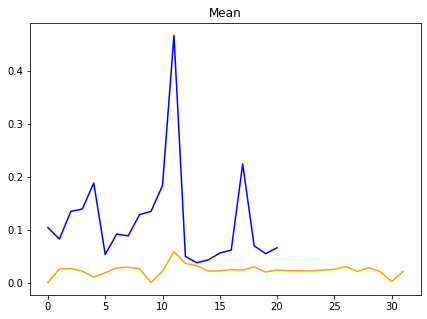

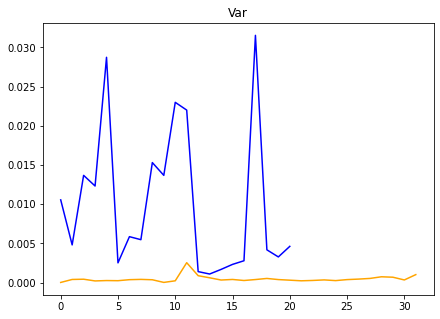

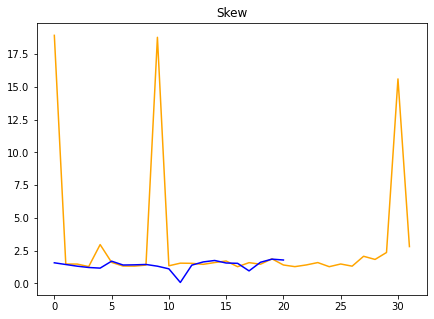

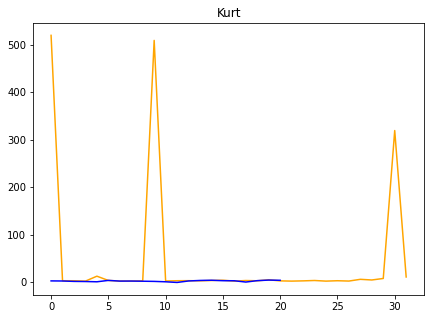

In [5]:
# matplotlib histogram
plt.figure(1, figsize=(7,5))
plt.plot(mean_val,'orange')
plt.plot(mean_val2,'blue')
plt.title("Mean")
plt.show()

# matplotlib histogram
plt.figure(1, figsize=(7,5))
plt.plot(var_val,'orange')
plt.plot(var_val2,'blue')
plt.title("Var")
plt.show()

# matplotlib histogram
plt.figure(1, figsize=(7,5))
plt.plot(skew_val,'orange')
plt.plot(skew_val2,'blue')
plt.title("Skew")
plt.show()

# matplotlib histogram
plt.figure(1, figsize=(7,5))
plt.plot(kurt_val,'orange')
plt.plot(kurt_val2,'blue')
plt.title("Kurt")
plt.show()

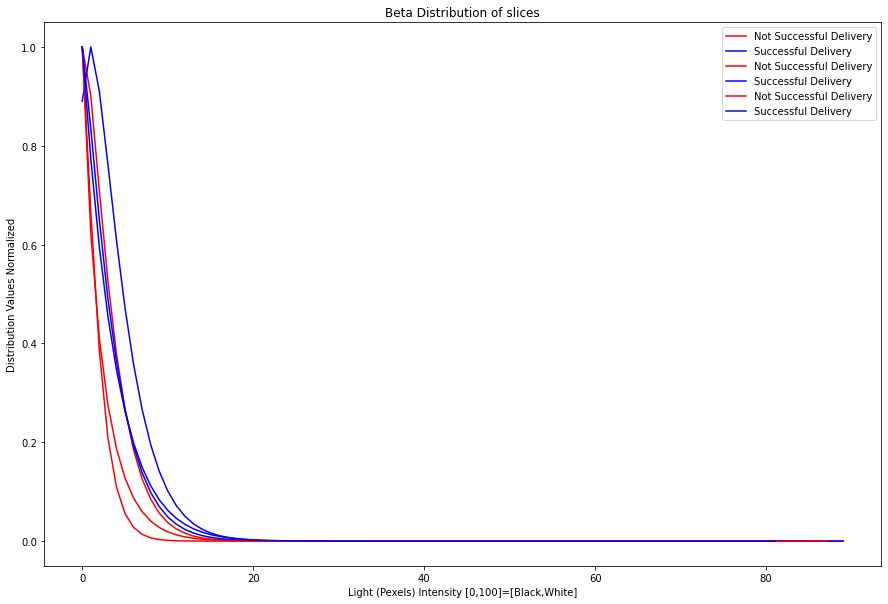

In [32]:
# matplotlib histogram
plt.figure(1, figsize=(15,10))
#for i in range(0,len(y_beta_list)):
for i in range(12,15):
    plt.plot(y_beta_list[i],'red',label='Not Successful Delivery')
    if i < len(y_beta_list2):
        plt.plot(y_beta_list2[i],'blue',label='Successful Delivery')
plt.legend()
plt.title("Beta Distribution of slices")
plt.xlabel("Light (Pexels) Intensity [0,100]=[Black,White]")
plt.ylabel("Distribution Values Normalized")
plt.show()

Original Image Shape: (526, 306, 4)
Gray Original Image Shape: (526, 306)
Gray Image Resized Shape:  (105, 61)
Gray Image Resized Flattend Shape:  (6405,)
70th percentile of arr :  22.0
Mean Original: 24.065886026541765
SD Original: 8.756611830880779
Mean Original without Edges: 29.782178217821784
SD Original without Edges: 5.447551835268884


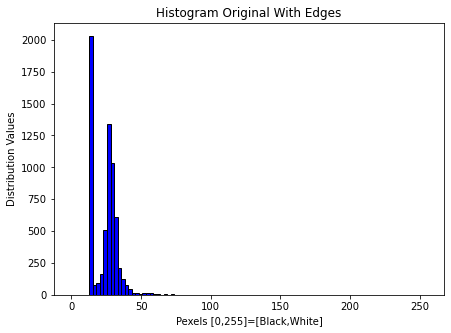

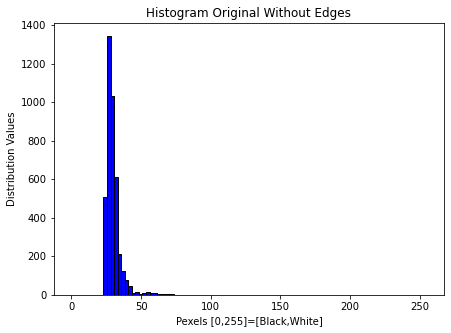

Histogram Shape Original Image without Edges with 100 Bins: (100,)


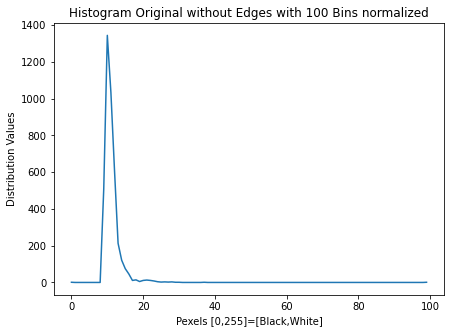

Histogram Original without Edges with 100 Bins normalized (100,)


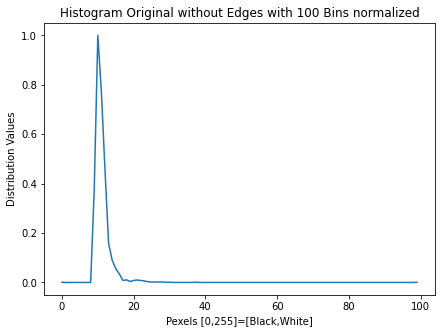

Max value: 1.0   with Max index: 10
Distribution list Shape from Max value and after: (90,)


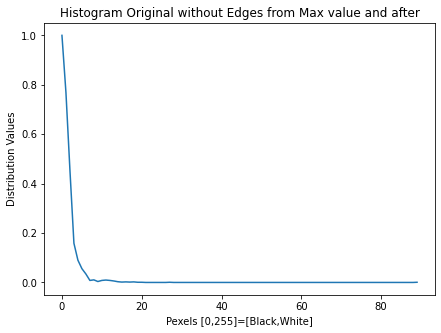

Best Correlation: 0.9988834519601426  with (a,b): 2.01 91.5
Mean, Variance, Skew, Kurtosis: 0.021495027269810712 0.00022254778407026563 1.3433400550473804 2.616626743997182


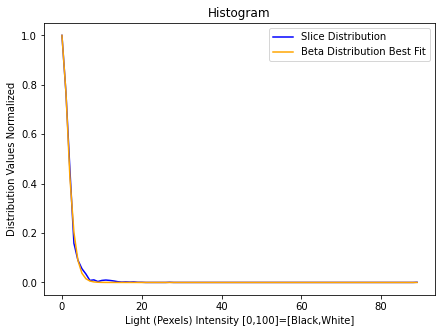

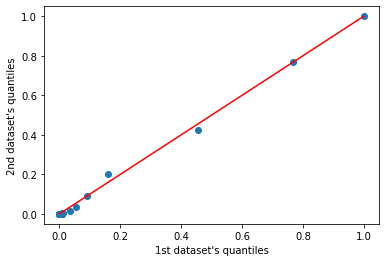

In [26]:
img, img_flattened = Read_Image_Gray_Down_Scale("D:/Ultrasound/Slices-Images/2019_02_04-M08-11.png", 20)
# 2019_02_04-M08-1.png
# 2019_03_13-M01-2.png 99.35
img_flattened_without_edges = Remove_From_Image_Edges_Background(img,img_flattened,10,70)

img_mean, img_std = Calculate_Mean_SD(img_flattened,"Original")
img_without_edges_mean, img_without_edges_std = Calculate_Mean_SD(img_flattened_without_edges,"Original without Edges")

img_flattened = Add_Black_White_Limits(img_flattened)
img_flattened_without_edges = Add_Black_White_Limits(img_flattened_without_edges)

Plot_Basic_Histogram(img_flattened,"Original With Edges","Distribution Values","Pexels [0,255]=[Black,White]")
Plot_Basic_Histogram(img_flattened_without_edges,"Original Without Edges","Distribution Values","Pexels [0,255]=[Black,White]")

#------------------------------------------------------------------- Histograms & Normalization
img_flattened_without_edges_hist, _ = np.histogram(img_flattened_without_edges, bins=100)
print("Histogram Shape Original Image without Edges with 100 Bins:",img_flattened_without_edges_hist.shape)
Plot_Basic(img_flattened_without_edges_hist,"Histogram Original without Edges with 100 Bins normalized","Distribution Values","Pexels [0,255]=[Black,White]")
img_flattened_without_edges_hist_normalized = Normalization_of_List(img_flattened_without_edges_hist)
img_flattened_without_edges_hist_normalized = img_flattened_without_edges_hist_normalized.reshape(-1)
print("Histogram Original without Edges with 100 Bins normalized",img_flattened_without_edges_hist_normalized.shape)
Plot_Basic(img_flattened_without_edges_hist_normalized,"Histogram Original without Edges with 100 Bins normalized","Distribution Values","Pexels [0,255]=[Black,White]")

#------------------------------------------------------------------- 
img_flattened_without_edges_hist_normalized_short = Array_1d_From_Pick_And_After(img_flattened_without_edges_hist_normalized)
Plot_Basic(img_flattened_without_edges_hist_normalized_short,"Histogram Original without Edges from Max value and after","Distribution Values","Pexels [0,255]=[Black,White]")

#------------------------------------------------------------------- 
a, b, mean, var, skew, kurt, x_beta, y_beta = Beta_Distribution_Best_Fit(img_flattened_without_edges_hist_normalized_short)

# matplotlib histogram
plt.figure(1, figsize=(7,5))
plt.plot(img_flattened_without_edges_hist_normalized_short,'blue',label='Slice Distribution')
plt.plot(y_beta,'orange',label='Beta Distribution Best Fit')
plt.title("Histogram")
plt.legend()
plt.xlabel("Light (Pexels) Intensity [0,100]=[Black,White]")
plt.ylabel("Distribution Values Normalized")
plt.show()

x1 = img_flattened_without_edges_hist_normalized_short
x2 = y_beta
plt.scatter(x1,x2)
plt.plot([min(x1),max(x1)],[min(x1),max(x1)],color="red")
plt.xlabel("1st dataset's quantiles")
plt.ylabel("2nd dataset's quantiles")
plt.show()